<h3><strong>APPENDIX A</strong></h3>
<br>
<p>This appendix contains all the code that was used to geenrated the figured in the results section.</p>
<p>In general, nly hIAPP_A figures are shown, unless showing more datasets was required.</p>
<p>However, figures for the other datasets can be shown by commenting in the appropriate lines of code.</p>
<p>Results from the other test datasets can be plotting using the functions presented in this section.</p>
<p>The filenames refer to the text files storing individual voltage data for each species_slice combination</p>
<p>The text files are available in this repository</p>

<h4><em>The following libraries are required to run this code</em>:</p>

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CloughTocher2DInterpolator
from matplotlib.colors import LinearSegmentedColormap
import pomegranate
from pomegranate import GeneralMixtureModel, MultivariateGaussianDistribution, IndependentComponentsDistribution, NormalDistribution
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.interpolate import interp2d, RectBivariateSpline

<h6>Fitting Gaussian peaks to 1D data using Sci Kit Learn</h6>
<p>This first function extracts data from the test datasets for Gaussian fitting in 1D</p>
<p>From the dictionary that is returned, Figures 1, 2 and 3E-H can be plotted.</p>
<p>In addition to the four test datasets, an artificial dataset has been created which is used in Figure 6/</p>

In [112]:
hIAPP_A = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt', 
                 '2021-03-03_IAPP_2n5_sliceA_10V_dt_extracted.txt', 
                 '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt', 
                 '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt', 
                 '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt', 
                 '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt', 
                 '2021-03-03_IAPP_2n5_sliceA_60V_dt_extracted.txt', 
                 '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt']

hIAPP_B = ['2021-03-03_IAPP_2n5_sliceB_0V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_10V_02_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_70V_dt_extracted.txt']

rIAPP_A =['2021-03-04_rIAPP_2n5_sliceA_0V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_10V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_20V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_30V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_40V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_50V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_60V_dt_extracted.txt']

rIAPP_B = ['2021-03-04_rIAPP_2n5_sliceB_0V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_10V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_20V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_30V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_40V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_50V_02_dt_extracted.txt']

fake_hiapp = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt', 
         'fake_fake_fake_fake_10V_fake_fake.txt', 
         '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt', 
         '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt', 
         '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt', 
         '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt', 
         'fake_fake_fake_fake_60V_fake_fake.txt', 
         'fake_fake_fake_fake_70V_fake_fake.txt']


def extract_data_for1d(filename_list):
    '''extracts volt, time, intensity datafrom files and filenames in filelist.
    returns dict[V] = (time[x], intensity[y])'''
    datastore = {}
    for filename in filename_list:
        with open (filename, 'r') as f:
            filenameparts = filename.split('_')
            voltage = filenameparts[4].replace('V', '')
            voltage = int(voltage)
            arrtime = []
            intensity = []
            for dataline in f:
                dataline = dataline.replace('\n', '')
                arrtime_intensity = dataline.split('\t')
                arrtime.append(float(arrtime_intensity[0]))
                intensity.append(float(arrtime_intensity[1]))
            intensity_smaller = [n/100 for n in intensity]    
            x = np.array(arrtime)
            y = np.array(intensity_smaller)
            #y = np.array(intensity)
            datastore[voltage] = (x,y)
    return datastore

datastore1dHA = extract_data_for1d(hIAPP_A)
datastore1dHB = extract_data_for1d(hIAPP_B)
datastore1dRA = extract_data_for1d(rIAPP_A)
datastore1dRB = extract_data_for1d(rIAPP_B)
datastore1dFAKE = extract_data_for1d(fake_hiapp)

<h4><em>The below function plots line plost of the above data<em></h4>
<h4><em>This figure was not shown in the results </em></h4>

In [113]:
###PLOTS LINE PLOTS ONLY. FIGURE NOT SHOWN IN RESULTS ###
def plot_raw_data(datastore):
    '''func. for plotting data shown in Fig. 1'''
    fig, axarr = plt.subplots(2,4, sharex = 'col', sharey='row')
    fig.set_size_inches(16, 4)
    row = 0
    col = 0

    for key, (x,y) in datastore.items():
        ax = axarr[row, col]
        ax.scatter(x,y, s=2)
        ax.plot(x,y)
        ax.set_title(f'{key} volts')
        ax.set_xlabel('time (ms)')
        ax.set_ylabel('intensity') 
        col += 1
        if col == 4:
            col = 0
            row += 1

    for ax in axarr.flat:
        ax.set(xlabel='time (ms)', ylabel='intensity')
    for ax in axarr.flat:
        ax.label_outer()

    plt.show()


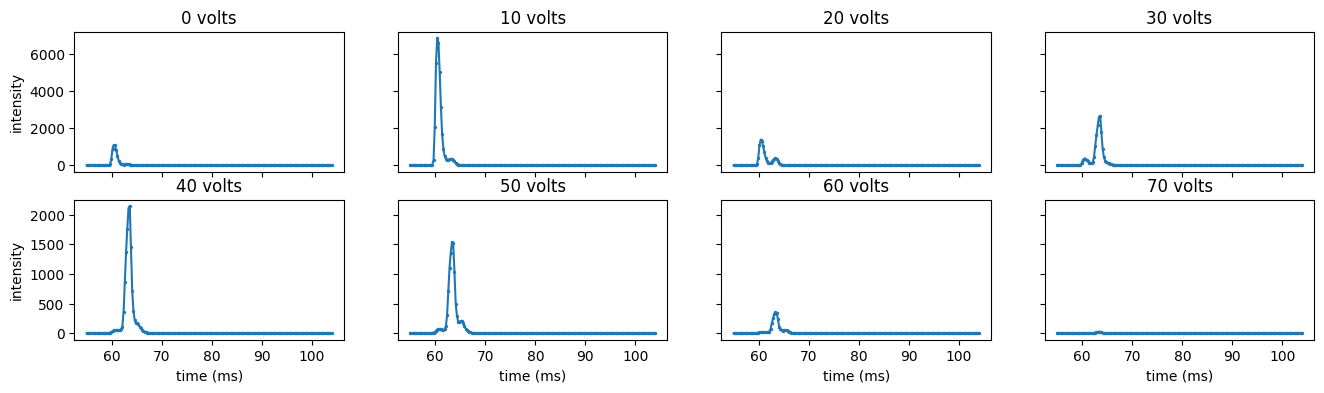

In [114]:
plot_raw_data(datastore1dHA)

<h4><em>The following function was used for 1D Gaussian fitting to data from each voltage with the IAPP datasets</em></h4>

In [115]:

def fit_plot_rawdata_histdata_GMM(datastore):
    '''Takes datafile list containing individual voltage datafiles as input.
    Represents intensity by the number of datapoints at an arrival time.
    Fits Gaussians to individual voltage datafiles in 1D using SciKitLearn GM module.
    Returns raw data line plots and datapoints coloured by Gaussian cluster.'''
    histdatastore = dict.fromkeys(datastore) #gets dict with voltages as keys and blank values

    for key, (x,y) in datastore.items():
        histdata = []
        for index, intensity in enumerate(y):
            time = x[index]
            histdata += [time]*int(intensity) #makes list of time points equivalent to intensity at that time
        histarr = np.array(histdata)
        histarr = histarr.reshape(-1,1)
        histdatastore[key] = histarr #data is now 'histogram-like'
    #key_to_value_lengths = {k:len(v) for k, v in histdatastore.items()} #checking length of each value list

    fig, axarr = plt.subplots(2,4, sharex = True, sharey=True)
    fig.set_size_inches(16, 4)
    row = 0
    col = 0

    for key, (x,y) in datastore.items():
        ax = axarr[row, col]
        ax.scatter(x,y, s=2) #makes line plot of raw data
        ax.plot(x,y)
        ax.set_xlim(56,72)
        ax.set_title(f'{key} volts')
        ax.set_xlabel('time (ms)')
        ax.set_ylabel('intensity') 
        col += 1
        if col == 4:
            col = 0
            row += 1

    for ax in axarr.flat:
        ax.set(xlabel='time (ms)', ylabel='intensity')
        ax.label_outer()

    row = 0
    col = 0
    for key, array in histdatastore.items():
        gm = GaussianMixture(n_components=3, max_iter=100, init_params='kmeans', 
                             covariance_type='full', random_state=0).fit(array) #Gaussian fitting with default settings
        labels = gm.predict(array) #gets the predicted Gaussian associated with each datapoint for coloring purposes
        y = datastore[key][1]
        fake_y = [-0.1 * y.max()]*len(labels) #makes y values so the histogram data can be plotted below the line plot. 
        ax = axarr[row, col]
        ax.scatter(array, fake_y, c=labels, s=12, cmap='viridis',alpha=0.02)
        ax.set_title(f'{key} Volts')
        col += 1
        if col == 4:
            col = 0
            row += 1        

    plt.tight_layout()

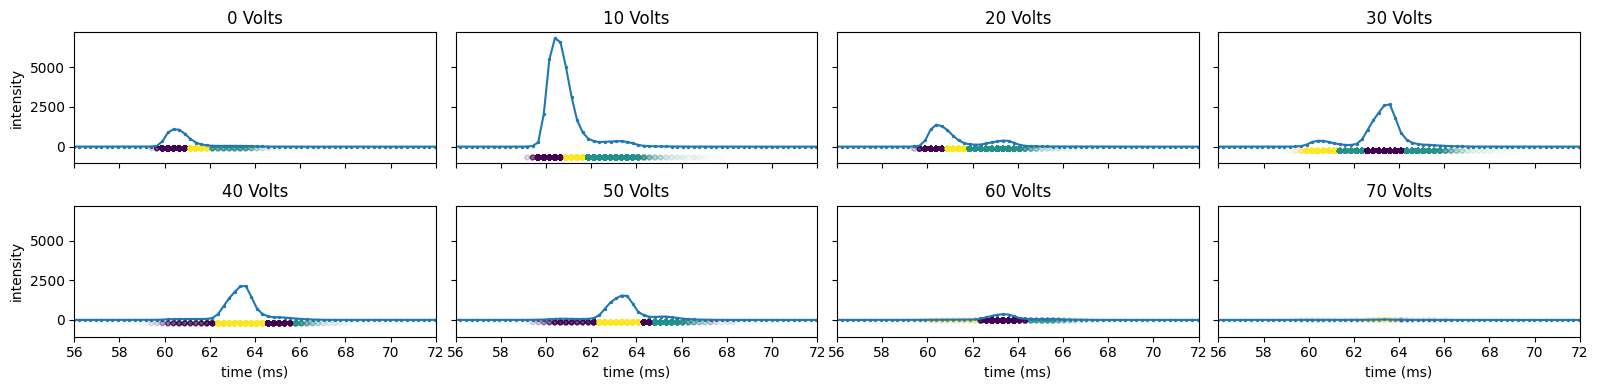

In [5]:
### PLOTS FIGURE 1 ####
fit_plot_rawdata_histdata_GMM(datastore1dHA)
#fit_plot_rawdata_histdata_GMM(datastore1dHB)
#fit_plot_rawdata_histdata_GMM(datastore1dRA)
#fit_plot_rawdata_histdata_GMM(datastore1dRB)

<h4><em>Fitting Gaussian peaks in 2D using SciKitLearn<em></h4>

<p>The 'extract_data_for_2d' function extracts data from the same files as 'extact_data_for_1d' but this time converts the data into a grid-like format and returns a 2D array.</p>
<p>This 2D array forms the basis for plots shown in Figures 3A-D, 4, 5 and 6.</p>
<p>The first actual 2D Gaussian fitting is done in the next function, 'skl_gmmfit_plot_histdata'</p>

In [6]:

def extract_data_for2d(filenames):
    '''Takes datafile list containing individual voltage datafiles as input. 
    Represents intensity by the number of datapoints at an arrival time.
    Makes data-grid by assigning a y-value to all x-values at an arrival time.
    Return numpy array of data density and other parameters for plotting'''
    XData = []
    YData = []

    for filename in filenames:
        filenameparts = filename.split('_')
        voltage = filenameparts[4].replace('V', '')
        voltage = int(voltage)
        arrtime = []
        intensity = []
        xdata = []
        ydata = []
        with open (filename, 'r') as f:
            for dataline in f:
                dataline = dataline.replace('\n', '')
                arrtime_intensity = dataline.split('\t')
                arrtime.append(float(arrtime_intensity[0]))
                intensity.append(int(arrtime_intensity[1]))
        for index, intensity_value in enumerate(intensity):
            if intensity_value > 1.0: #NB does not include zero values
                n = int(intensity_value/100.) #reduces the size of the intensity values for faster processing
                xdata += [arrtime[index]]*n #make histogram-like data containing multiple points per arrival time
        ydata = [voltage]*len(xdata) #each of these points gets a corresponding voltages; data becomes grid-like
        XData.extend(xdata)
        YData.extend(ydata)
        arrtime = []
        intensity = []
        xdata = []
        ydata = []

    XArr = np.array(XData)
    YArr = np.array(YData)
    XYArrDiv = np.column_stack((XArr,YArr))
    x_range = (50, 80)
    y_range = (-10, 100)
    hist, x_edges, y_edges = np.histogram2d(XYArrDiv[:, 0], XYArrDiv[:, 1], bins=(120,8), range=[x_range, y_range], density=True)
    input_density = hist.T

    return XData, YData, XYArrDiv, x_range, y_range, input_density

In [7]:
#calls above function for for all datasets. 
XDataHA, YDataHA, XYArrDivHA, x_rangeHA, y_rangeHA, input_densityHA = extract_data_for2d(hIAPP_A)
XDataHB, YDataHB, XYArrDivHB, x_rangeHB, y_rangeHB, input_densityHB = extract_data_for2d(hIAPP_B)
XDataRA, YDataRA, XYArrDivRA, x_rangeRA, y_rangeRA, input_densityRA = extract_data_for2d(rIAPP_A)
XDataRB, YDataRB, XYArrDivHB, x_rangeRB, y_rangeRB, input_densityRB = extract_data_for2d(rIAPP_B)
XDataFAKE, YDataFAKE, XYArrDivFAKE, x_rangeFAKE, y_rangeFAKE, input_densityFAKE = extract_data_for2d(fake_hiapp)

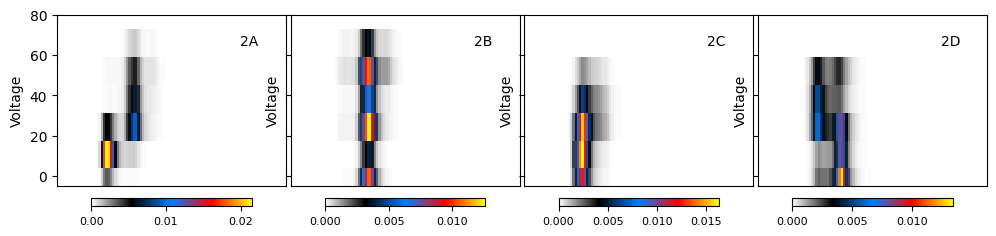

In [79]:
### PLOTS FIGURE 2A-D ###
xlists = [x_rangeHA, x_rangeHB, x_rangeRA, x_rangeRB]#, x_rangeFAKE]
ylists = [y_rangeHA, y_rangeHB, y_rangeRA, y_rangeRB]#, y_rangeFAKE]
denselists = [input_densityHA, input_densityHB, input_densityRA, input_densityRB]
subfigs = ['2A', '2B', '2C', '2D']#, '2E']

density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)

fig, axarr = plt.subplots(1,4, figsize=(12,4), sharey=True)

for i, data in enumerate(xlists):
    axarr[i].set_xlim(xlists[i])
    axarr[i].set_ylim(ylists[i])
   # axarr[i].set_xlabel('arrival time (ms)')
    axarr[i].set_ylabel('Voltage')
    im = axarr[i].imshow(denselists[i], cmap=density_colormap, origin='lower', extent=xlists[i] + ylists[i], aspect=0.22, interpolation='none') 
    axarr[i].set_ylim(-5,80)
    axarr[i].set_xlim(55,80)
    axarr[i].annotate(subfigs[i], xy=(75,65))
    axarr[i].set_xticks([])
    cbar = plt.colorbar(im, ax=axarr[i], orientation='horizontal', shrink=0.7, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

#cax = fig.add_axes((0.92, 0.25, 0.02, 0.4)) # (x0, y0, width, height)    
#cax.tick_params(labelsize=7)
#plt.colorbar(im, cax=cax)

fig.subplots_adjust(wspace=0.02, hspace=0)

for ax in axarr.flat:
    ax.label_outer()

plt.show()

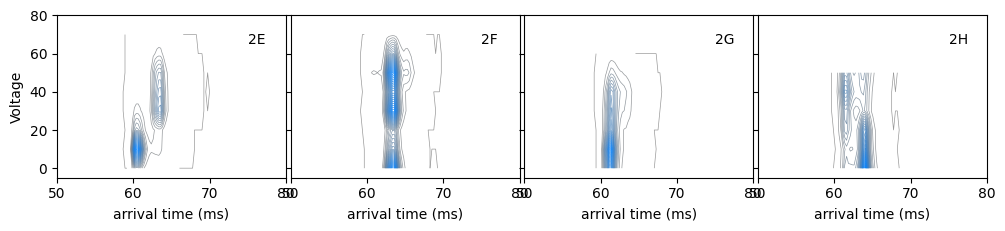

In [9]:
### PLOTS FIGURE 2E-H. NB takes 1D datastores as input. ###
fig, axarr = plt.subplots(1,4, figsize = (12,4))
n_contours = 32
contour_colormap = LinearSegmentedColormap.from_list(name='contour', colors=['#808080','#0080FF'], N=n_contours)
subfigs = ['2E', '2F', '2G', '2H']#, '2I']

datastores = [datastore1dHA, datastore1dHB, datastore1dRA, datastore1dRB]#, datastore1dFAKE]

for i, datastore in enumerate(datastores):
    y_axis = np.array(sorted(datastore))
    x_axis = datastore[y_axis[0]][0]
    nx = len(x_axis)
    ny = len(y_axis)
    z_intens = np.zeros((ny,nx))
    for j, y in enumerate(y_axis):
        arrt, intens = datastore[y]
        z_intens[j] = intens
    too_small = z_intens < 1.0 #sets all tiny values to zero, so contour plots don't look weird
    z_intens[too_small] = 0.0 

    axarr[i].contour(x_axis, y_axis, z_intens, levels=n_contours, alpha=0.8, cmap=contour_colormap, linewidths=0.5)
    axarr[i].set_xlim(50,80)
    axarr[i].set_xlabel('arrival time (ms)')
    axarr[i].set_ylabel('Voltage')
    axarr[i].set_ylim(-5,80)
    axarr[i].set_aspect(0.25)
    axarr[i].annotate(subfigs[i], xy=(75,65))
    
    fig.subplots_adjust(wspace=0.02, hspace=0)
for ax in axarr.flat:
    ax.label_outer()

plt.show()

<p>The next function, skl_gmmfit_plot_histdata, is the first true fitting of Gaussians to 2D data.</p>
<p>It takes part of the output from 'extract_data_for2d' and return the 'typical output' of means, s.e.m's, colour-by-Gaussian plots, density plots and contour plots that is frequently compared in the results section.</p>

In [91]:

density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)

def skl_gmmfit_plot_histdata(XYArrDiv, n_grid, test_n_components):
    '''XYArrDiv is from extract_data_for2D.
    n_grid (intenger) sets data grid size, test_n_components is list of integers.
    Returns results  as plots'''
    fig, axarr = plt.subplots(4, len(test_n_components), sharex = 'col', sharey='row')
    fig.set_size_inches(9,9)
    subfigs1 = ['3A', '3B', '3C', '3D']
    subfigs2 = ['3E', '3F', '3G', '3H']
    subfigs3 = ['3I', '3J', '3K', '3L']
    subfigs4 = ['3M', '3N', '3O', '3P']# replace with '5' as needed
    
    n_grid = n_grid
    
    best_bic = float('inf')
    best_gmm = None
    
    x_range = (50, 80)
    y_range = (-10, 100)

    for i, n_comp in enumerate(test_n_components):
        gmm = GaussianMixture(n_components=n_comp, covariance_type='full')
        gmm.fit(XYArrDiv)

        bic = gmm.bic(XYArrDiv) # For evaluating best n_comp

        x_vals_mean = gmm.means_[:,0]
        y_vals_mean = gmm.means_[:,1]

        # Sqrt for Var to Std
        x_vals_std = np.sqrt(gmm.covariances_[:,0,0]) # x to x variance from covar matrix (need to change this for full vs diag)
        y_vals_std = np.sqrt(gmm.covariances_[:,1,1]) # y to y variance from covar matrix (change to [:,1])

        x1, x2 = x_range
        y1, y2 = y_range
        aspect = (x2-x1)/(y2-y1)

        x_points = np.linspace(x1, x2, n_grid) # Axis points
        y_points = np.linspace(y1, y2, n_grid)

        x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of coordinates
        x_grid_flat = x_grid.ravel()  # Flatten to list
        y_grid_flat = y_grid.ravel() 
        stacked_points = np.array([x_grid_flat, y_grid_flat]).T # to get x,y pairs

        density = gmm.score_samples(stacked_points) # comes as log probabilties
        density = np.exp(density) # Real probabilities
        density_2d = density.reshape([n_grid, n_grid]) # Restore points grid (of heights)

        labels = gmm.predict(XYArrDiv)

        ax1 = axarr[0,i]
        ax1.scatter(XYArrDiv[:, 0], XYArrDiv[:, 1], s=50, alpha=0.2, c='#B0B0B0')
        ax1.errorbar(x_vals_mean, y_vals_mean, x_vals_std, y_vals_std, fmt='none', color='red',alpha=0.3,  label='StdDevs', capsize=0.5)
        ax1.scatter(x_vals_mean, y_vals_mean, s=10, c='black', marker='o', label='Means')
        ax1.set_title(f'{n_comp} component BIC={bic:.1f}', fontsize=8)
        ax1.annotate(subfigs1[i], xy=(53,65))
        if i == 0:
            ax1.legend()

        # Component predition of _original_ points 
        ax2 = axarr[1,i] 
        ax2.set_xlim(x_range)
        ax2.set_ylim(-10,80)
        ax2.annotate(subfigs2[i], xy=(53,65))
        for j in range(n_comp):
            selection = labels == j # Bool array: True where labels are this comp (j)
            ax2.scatter(XYArrDiv[selection, 0], XYArrDiv[selection, 1], s=50, alpha=0.2)
            
        # Density estimation of a grid of points
        ax3 = axarr[2,i]
        ax3.annotate(subfigs3[i], xy=(53,65))
        ax3.imshow(density_2d, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect) 
        ax3.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
        ax3.legend()
        
        if i == 3:
            cax = fig.add_axes((0.92, 0.32, 0.017, 0.15)) # (x0, y0, width, height)    
            cax.tick_params(labelsize=7)
            plt.colorbar(im, cax=cax)

        ax4 = axarr[3,i]
        ax4.annotate(subfigs4[i], xy=(53,65))
        ax4.contour(x_grid, y_grid, density_2d, levels=n_contours, alpha=0.5, cmap=contour_colormap)
        ax4.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
        ax4.legend()

    fig.subplots_adjust(wspace=0.02, hspace=0.02)
    for ax in axarr.flat:
        ax.set(xlabel='time (ms)', ylabel='voltage')
        ax.set_ylim(-10,80)
        ax.set_xlim(50,80)
    for ax in axarr.flat:
        ax.label_outer()

    plt.show()

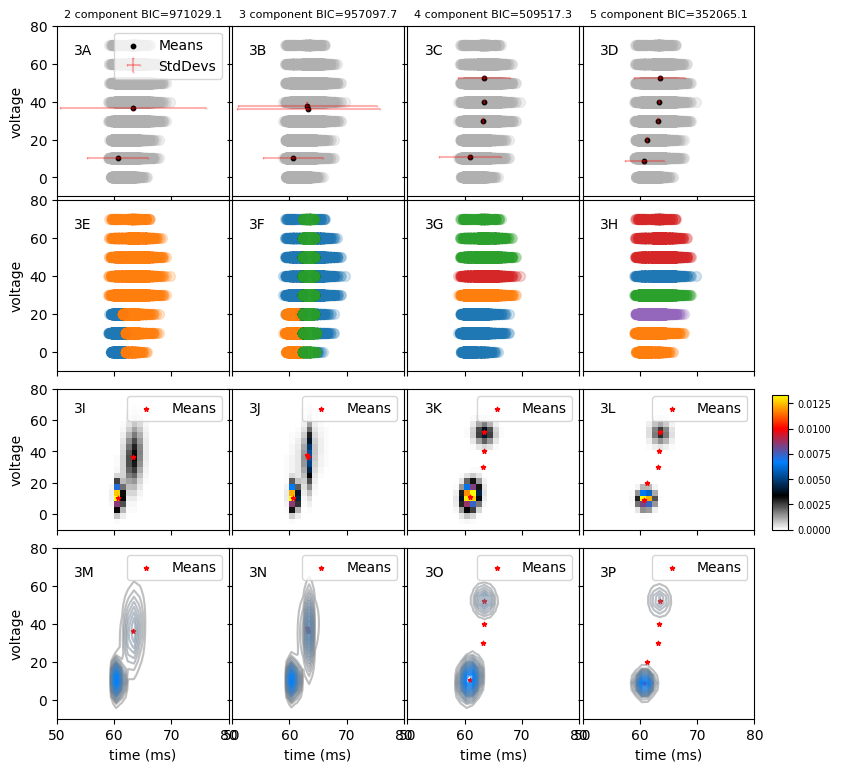

In [92]:
### PLOTS FIGURE 3 ###
sklgmm_listHA = skl_gmmfit_plot_histdata(XYArrDivHA, 30, [2,3, 4, 5])
#sklgmm_listHB = skl_gmmfit_plot_histdata(XYArrDivHB, 30, [2,3, 4, 5])
#sklgmm_listRA = skl_gmmfit_plot_histdata(XYArrDivRA, 30, [2,3, 4, 5])
#sklgmm_listRB = skl_gmmfit_plot_histdata(XYArrDivRB, 30, [2,3, 4, 5])

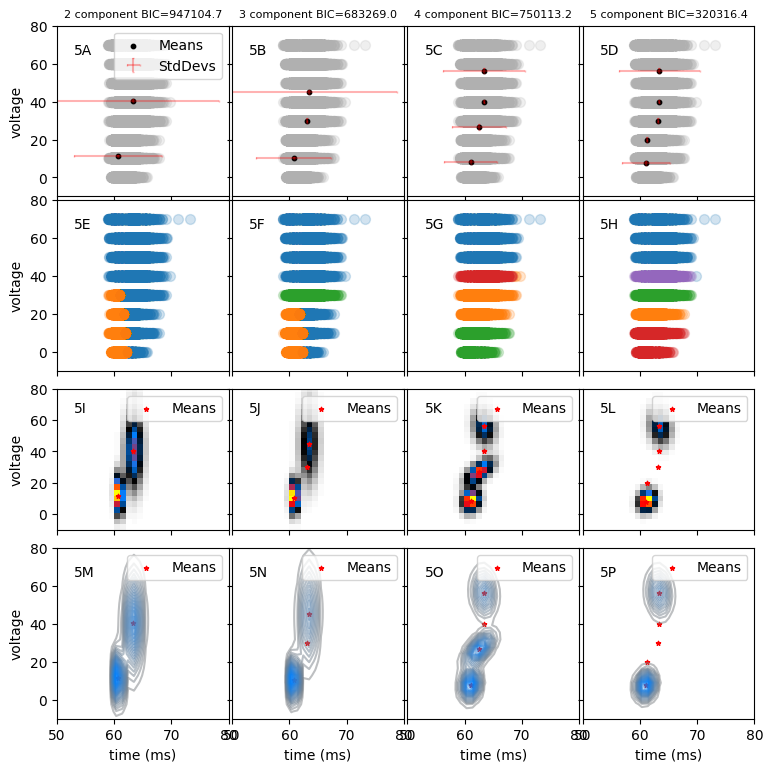

In [12]:
### PLOTS FIGURE 5 ###
sklgmm_listFAKE = skl_gmmfit_plot_histdata(XYArrDivFAKE, 30, [2,3, 4, 5])

<p>The parameters in the SciKitLearn 2D function are comprehensively explored in the 'explore_skl_gmm' function</p>
<p>This has little impact on the results but was included for completeness</p>

In [13]:
### PLOTS FIGURE 4 ###

def explore_sklgmm_params(XData, YData):
    '''Takes part of the output from the extract_data_for2d function
    Performs redundant column-stacking
    Tests impact of most important SKL GMM parameters.
    Returns plots with data points coloured by component'''
    XArr = np.array(XData)
    YArr = np.array(YData)
    XYArr = np.column_stack((XArr,YArr))

    fig, axarr = plt.subplots(2,3, sharex = 'col', sharey='row')
    fig.set_size_inches(9,3)

    ax1 = axarr[0,0]
    gm2 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', random_state=1).fit(XYArr)
    labels = gm2.predict(XYArr)
    ax1.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
    ax1.set_title('full, k-means')

    ax2 = axarr[0,1]
    gm3 = GaussianMixture(n_components=3, max_iter=100, covariance_type='tied', random_state=1).fit(XYArr)
    labels = gm3.predict(XYArr)
    ax2.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
    ax2.set_title('tied, k-means')

    ax3 = axarr[0,2]
    gm4 = GaussianMixture(n_components=3, max_iter=100, covariance_type='diag', random_state=1).fit(XYArr)
    labels = gm4.predict(XYArr)
    ax3.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
    ax3.set_title('diag, k-means')

    ax4 = axarr[1,0]
    gm2 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', init_params='k-means++', random_state=1).fit(XYArr)
    labels = gm2.predict(XYArr)
    ax4.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
    ax4.set_title('full, k-means++')

    ax5 = axarr[1,1]
    gm3 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', init_params='random_from_data', random_state=1).fit(XYArr)
    labels = gm3.predict(XYArr)
    ax5.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
    ax5.set_title('full, random_from_data')

    ax6 = axarr[1,2]
    gm4 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', init_params='random', random_state=1).fit(XYArr)
    labels = gm4.predict(XYArr)
    ax6.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
    ax6.set_title('full, random')

    for ax in axarr.flat:
        ax.set(xlabel='arrival time (ms)', ylabel='voltage')
        ax.set_xlim(55,80)
        ax.set_ylim(0,80)
    for ax in axarr.flat:
        ax.label_outer()

    plt.tight_layout()

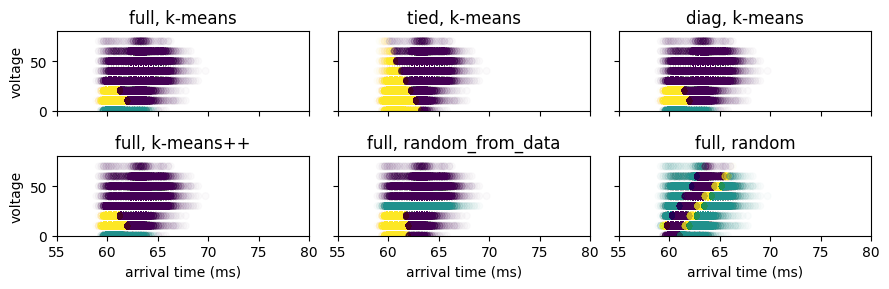

In [14]:
#### PLOTS FIGURE 4 ###
explore_sklgmm_params(XDataHA, YDataHA)
#explore_sklgmm_params(XDataHB, YDataHB)
#explore_sklgmm_params(XDataRA, YDataRA)
#explore_sklgmm_params(XDataRB, YDataRB)
#explore_sklgmm_params(XDataFAKE, YDataFAKE)

<h6>Fitting Gaussians using Pomegranate instead of SciKitLearn</h6>
<p>The next section of the methods uses the Pomegranate library to weight the data points according to intensity and fit Gaussians</p>

In [93]:

def extract_data_gmmfitPOM_plot(list_of_filenames):
    '''extracts data from raw files, makes array of size n_grid (currently 50), 
    containing intensity values at xy (time,voltage) coordinates.
    Returns plots in same format as for SciKitLearn GMM function'''
    test_n_components = [2,3,4,5]
    n_grid = 50

    fig, axarr = plt.subplots(4, len(test_n_components), sharex = 'col', sharey='row')
    fig.set_size_inches(9,9)
    subfigs1 = ['6A', '6B', '6C', '6D']
    subfigs2 = ['6E', '6F', '6G', '6H']
    subfigs3 = ['6I', '6J', '6K', '6L']
    subfigs4 = ['6M', '6N', '6O', '6P']

    AllData = [] 

    for filename in list_of_filenames:
        filenameparts = filename.split('_')
        voltage = filenameparts[4].replace('V', '')
        voltage = int(voltage)
        with open (filename, 'r') as f:
            for dataline in f:
                dataline = dataline.replace('\n', '')
                arrtime_intensity = dataline.split('\t')
                arrtime = (float(arrtime_intensity[0]))
                intensity = (int(arrtime_intensity[1]))
                alldata = (voltage, arrtime, intensity)
                AllData.append(alldata)

    NonZeroData = [c for c in AllData if c[2] != 0]
    ArrTimes = [c[1] for c in AllData if c[2] != 0]
    Intensities = [c[2] for c in AllData if c[2] != 0]
    Voltages = [c[0] for c in AllData if c[2] != 0]
    Coord_tuples = [(c[1],c[0]) for c in AllData if c[2] != 0]

    all_voltages = [x[0] for x in AllData]
    all_arrtimes = [x[1] for x in AllData if x[1]<85]

    Int_arr = np.asarray(Intensities)
    Volt_arr = np.asarray(Voltages)
    ArrT_arr = np.asarray(ArrTimes)
    Coord_arr = np.column_stack((ArrT_arr, Volt_arr))
    Coord_tup_arr = np.asarray(Coord_tuples)

    voltage_set = sorted(set(all_voltages)) #use for dictionary keys
    arrtime_set = sorted(set(all_arrtimes))
    vidx = {v:i for i,v in enumerate(voltage_set)} #the index gives the voltage coordinate
    aidx = {a:i for i,a in enumerate(arrtime_set)} #the index gives the arrival time coordinate
    input_density = np.zeros((len(voltage_set), len(arrtime_set))) #starts as array of zeros
    for v, a, intens in AllData:
        if a > 85: #only uses arrivals times above 85 where there is non-zero data
            continue
        j = vidx[v]
        k = aidx[a]
        input_density[j,k] = intens #intensity vals get filled into the array of zeros at correct coordinates 

    n_contours = 16
    density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)
    contour_colormap = LinearSegmentedColormap.from_list(name='contour', colors=['#B0B0B0','#0080FF'], N=n_contours)

    xgap = (max(all_arrtimes) - min(all_arrtimes))/10
    ygap = (max(all_voltages) - min(all_voltages))/10
    x_range = (min(all_arrtimes)-xgap, max(all_arrtimes)+xgap)
    y_range = (min(all_voltages)-ygap, max(all_voltages)+ygap)

    best_bic = float('inf')
    best_gmm = None

    #makes classes for min std dev in both directions. Min std is changed below.
    class MinStdNormalDistributionX(NormalDistribution):
        def __init__(self, *args, **kw):
            kw['min_std'] = 0.5
            NormalDistribution.__init__(self, *args, **kw)
    class MinStdNormalDistributionY(NormalDistribution):
        def __init__(self, *args, **kw):
            kw['min_std'] = 8
            NormalDistribution.__init__(self, *args, **kw)

    for i, n_comp in enumerate(test_n_components):
        ###THIS OPTION CAN BE USED FOR 'FULL' COVARIANCE
        #gmm = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution,n_comp, Coord_tup_arr, Int_arr, n_init=1)
        #x_vals_mean = [comp.parameters[0][0] for comp in gmm.distributions]
        #y_vals_mean = [comp.parameters[0][1] for comp in gmm.distributions]
        #covars = np.array([comp.parameters[1] for comp in gmm.distributions])
        #x_vals_std = np.sqrt(covars[:,0,0]) # x to x variance from covar matrix
        #y_vals_std = np.sqrt(covars[:,1,1]) # y to y variance from covar matrix

        ###THIS OPTION IS THE EQUIVALENT OF 'DIAG' CONVARIANCE
        gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                             n_comp, Coord_tup_arr, Int_arr, n_init = 5, max_kmeans_iterations = 30) 
        comp_params = [comp.parameters[0] for comp in gmm.distributions] # Selects IndependentComponentsDistribution for each Gaussian
        x_params = [cp[0].parameters for cp in comp_params] # NormalDistribution for X : Mean, Var pairs
        y_params = [cp[1].parameters for cp in comp_params] # NormalDistribution for Y : Mean, Var pairs
        x_vals_mean, x_vals_var = zip(*x_params) 
        y_vals_mean, y_vals_var = zip(*y_params) 
        x_vals_std = np.sqrt(x_vals_var)
        y_vals_std = np.sqrt(y_vals_var)

      # Degrees of freedom per Gaussian component: 2 (cov xx, yy[as diag]) + 2 (mean x, y) + 1 (weight)
      # all -1 due to sum weights == 1.0
        df = (5 * n_comp) - 1
        lp = (gmm.log_probability(Coord_tup_arr) * Int_arr).sum()
        bic = float(df * np.log(len(Coord_tup_arr)) - 2.0 * lp)
        labels = gmm.predict(Coord_tup_arr)

        x_points = np.linspace(x_range[0], x_range[1], n_grid) # sampling whole mesh for evaluation 
        y_points = np.linspace(y_range[0], y_range[1], n_grid)

        x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of coordinates
        x_grid_flat = x_grid.ravel()  # Flatten to list
        y_grid_flat = y_grid.ravel() 
        stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

        density = gmm.log_probability(stacked_points) # comes as log probabilties
        density = np.exp(density) # Real probs
        density_2d = density.reshape([n_grid, n_grid]) # Restore points grid (of heights) 

        ax1 = axarr[0,i]
        ax1.set_xlim(x_range)
        ax1.set_ylim(y_range)    
        ax1.scatter(ArrT_arr, Volt_arr, s=50, alpha=1.0, c='#B0B0B0')
        ax1.errorbar(x_vals_mean, y_vals_mean, x_vals_std, y_vals_std, fmt='none',color='red',alpha=0.3,  label='StdDevs', capsize=0.5)
        ax1.scatter(x_vals_mean, y_vals_mean, s=10, c='black', marker='o', label='Means')
        ax1.annotate(subfigs1[i], xy=(53,65))
        if i == 0:
            ax1.legend()

        ax2 = axarr[1,i] 
        ax2.set_xlim(x_range)
        ax2.set_ylim(y_range)
        ax2.annotate(subfigs2[i], xy=(53,65))
        for j in range(n_comp):
            selection = labels == j
            ax2.scatter(ArrT_arr[selection], Volt_arr[selection], s=50, alpha=0.4)
        

        ax3 = axarr[2,i] # third fig row
        ax3.set_xlim(x_range)
        ax3.set_ylim(y_range)
        ax3.annotate(subfigs3[i], xy=(53,65))
        aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])
        ax3.imshow(density_2d, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect) 
        ax3.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
        if i == 0:
            ax3.legend()

        if i == 3:
            cax = fig.add_axes((0.92, 0.32, 0.017, 0.15)) # (x0, y0, width, height)    
            cax.tick_params(labelsize=7)
            plt.colorbar(im, cax=cax)

        ax4 = axarr[3,i]
        ax4.annotate(subfigs4[i], xy=(53,65))
        ax4.contour(x_grid, y_grid, density_2d, levels=n_contours, alpha=0.5, cmap=contour_colormap)
        ax4.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
        if i == 0:
            ax4.legend()

    fig.subplots_adjust(wspace=0.02, hspace=0.02)
    for ax in axarr.flat:
        ax.set(xlabel='time (ms)', ylabel='voltage')
        ax.set_ylim(-10,80)
        ax.set_xlim(50,80)
    for ax in axarr.flat:
        ax.label_outer()

    plt.show()


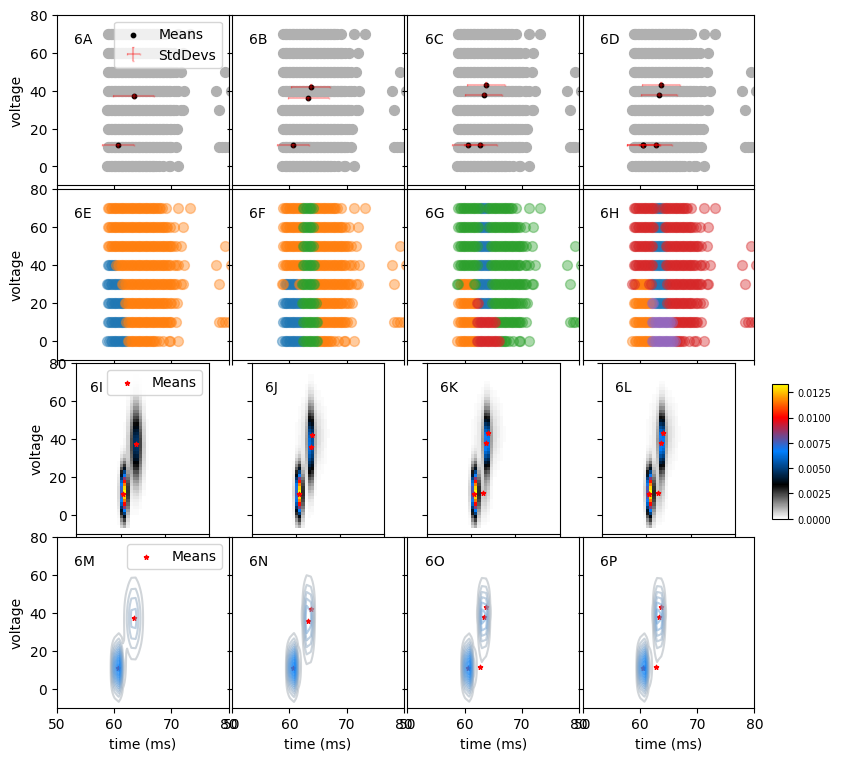

In [94]:
### PLOTS FIGURE 6 ###

hIAPP_A = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_10V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt']
extract_data_gmmfitPOM_plot(hIAPP_A)

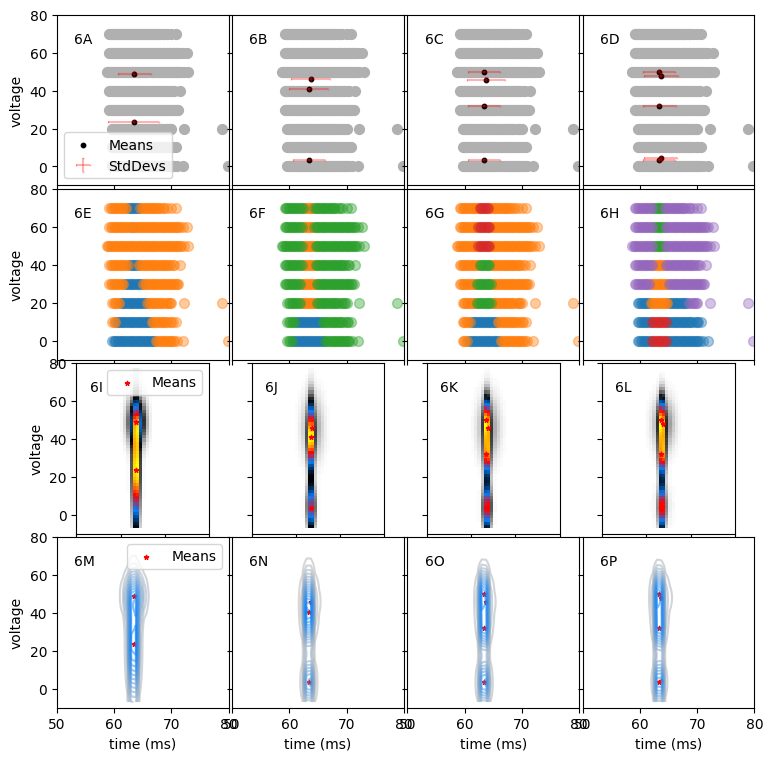

In [17]:
hIAPP_B = ['2021-03-03_IAPP_2n5_sliceB_0V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_10V_02_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_70V_dt_extracted.txt']
extract_data_gmmfitPOM_plot(hIAPP_B)

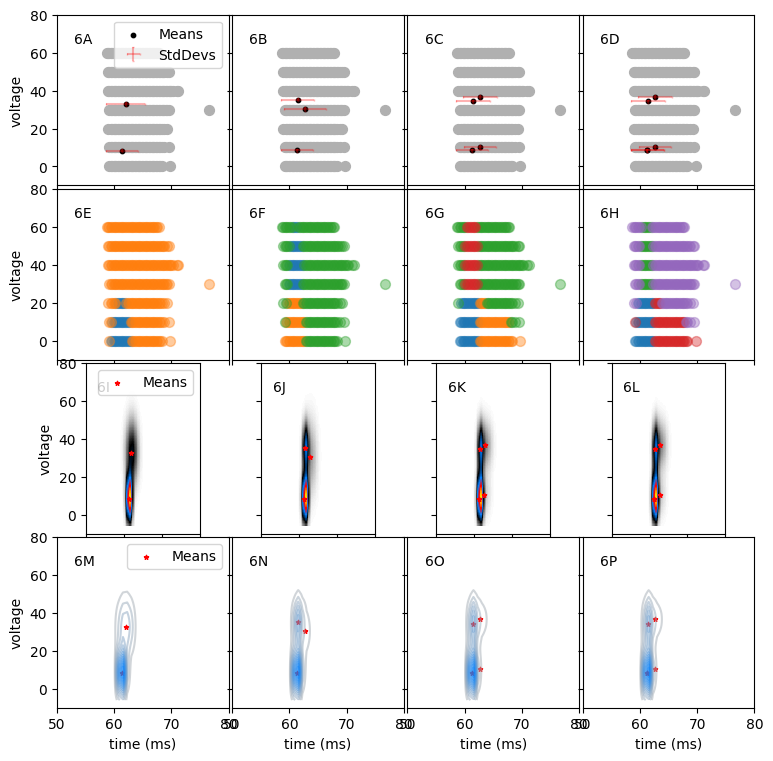

In [18]:
rIAPP_A =['2021-03-04_rIAPP_2n5_sliceA_0V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_10V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_20V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_30V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_40V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_50V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_60V_dt_extracted.txt']
extract_data_gmmfitPOM_plot(rIAPP_A)

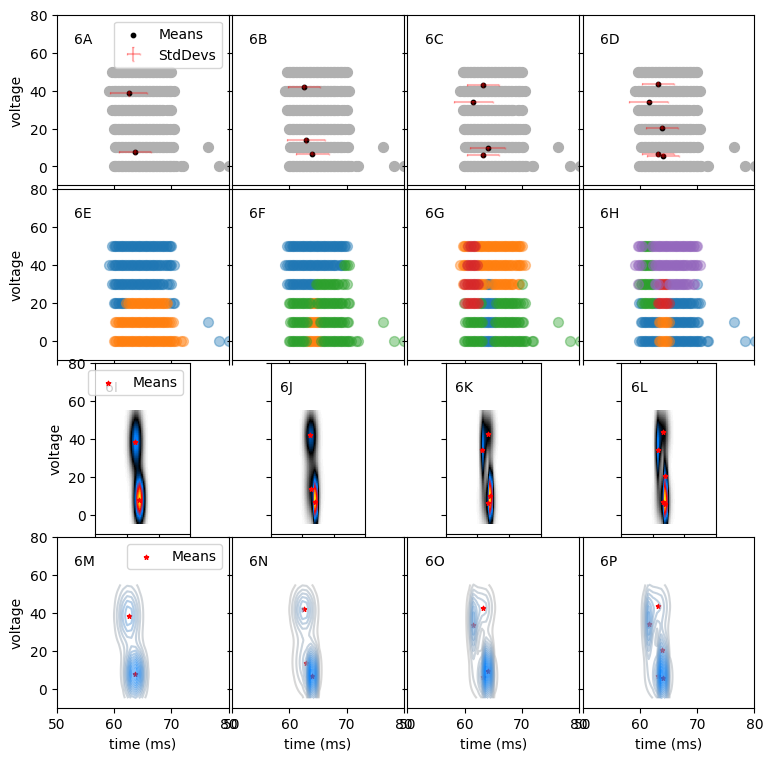

In [19]:
rIAPP_B = ['2021-03-04_rIAPP_2n5_sliceB_0V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_10V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_20V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_30V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_40V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_50V_02_dt_extracted.txt']
extract_data_gmmfitPOM_plot(rIAPP_B)

<h6>Interpolation of data and fitting Gaussians using Pomegranate</h6>
<p>In the section of the results, three interpolation methods (interp2d, RectBivriateSpline (RBV) and CloughTocher (CT)) are compared.</p>

In [100]:

def compare_interp2d_RBVspine_interpolation(filename_list):
    '''extracts data into lists for time and voltages, and a 2D array for intensity of dimensions time, voltage.
    returns density plots of data interpolated either by interp2d or RectBivariateSpline'''
    datastore = {}
    for filename in filename_list:
        with open (filename, 'r') as f:
            filenameparts = filename.split('_')
            voltage = filenameparts[4].replace('V', '')
            voltage = int(voltage)
            arrtime = []
            intensity = []
            for dataline in f:
                dataline = dataline.replace('\n', '')
                arrtime_intensity = dataline.split('\t')
                arrtime.append(float(arrtime_intensity[0]))
                intensity.append(float(arrtime_intensity[1]))         
                pairs = list(zip(arrtime, intensity))
            datastore[voltage] = pairs

    intensity0 = [0]*200
    pairs0 = list(zip(arrtime, intensity0))
    datastore[-10] = pairs0

    arrts_for2d = []
    intens_for2d = []
    volts_for2d = []

    RBarrts_for2d = []
    RBintens_for2d = []
    RBvolts_for2d = []

    for k, pair in datastore.items():
        for i in pair:
            if not i[1]: 
                continue ###skips the zero vals###. 
            arrts_for2d.append(i[0])
            intens_for2d.append(i[1])
            volts_for2d.append(k)

    for RBk, RBpair in datastore.items():
        for i in RBpair:
            RBarrts_for2d.append(i[0])
            RBintens_for2d.append(i[1])
            RBvolts_for2d.append(RBk)

    from scipy.interpolate import interp2d
    from matplotlib.colors import LinearSegmentedColormap

    X2d = np.array(arrts_for2d)
    Y2d = np.array(volts_for2d)
    Z2d = np.array(intens_for2d)

    RBX2d = np.array(sorted(set(RBarrts_for2d))) #flat list
    RBY2d = np.array(sorted(set(RBvolts_for2d))) #flat list 0 to 70 once
    RBZ2d = np.array(RBintens_for2d)
    RBZ2d = RBZ2d.reshape(len(RBY2d), len(RBX2d)).T

    interp_func = interp2d(X2d, Y2d, Z2d, kind='cubic', fill_value=0.0)
    RBinterp_func = RectBivariateSpline(RBX2d, RBY2d, RBZ2d, bbox=[None, None, None, None], kx=3, ky=3, s=0)

    X_max = 80
    X_min = 55#X2d.min() ##changed this recently
    Y_min = 0
    RBY_min = -10
    Y_max = 70

    n_smooth = 200 #previously was 100

    X2d_plot = np.linspace(X_min, X_max, n_smooth)
    Y2d_plot = np.linspace(Y_min, Y_max, n_smooth)
    RBY2d_plot = np.linspace(RBY_min, Y_max, n_smooth)

    Intens2d_plot = interp_func(X2d_plot, Y2d_plot)
    Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)
    RBIntens2d_plot = RBinterp_func(X2d_plot, RBY2d_plot)
    RBIntens2d_plot = np.clip(RBIntens2d_plot, a_min = 0, a_max = None)

    density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)

    fig, axarr = plt.subplots(1,2)
    x_range = (X_min, X_max) #min and max, effectively, cos it's sorted
    y_range = (Y_min, Y_max)
    aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])

    axarr[0].set_xlim(X_min, X_max)
    axarr[0].set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    axarr[0].imshow(Intens2d_plot, cmap=density_colormap, origin='lower',  extent=(X_min, X_max, Y_min, Y_max), aspect=aspect, vmin=0.0)
    axarr[0].set_xlabel('arrival time (ms)')
    axarr[0].set_ylabel('Voltage')
    axarr[0].annotate('7A', xy=(56,60))

    axarr[1].set_xlim(X_min, X_max)
    axarr[1].set_ylim(RBY_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - RBY_min)
    axarr[1].imshow(RBIntens2d_plot.T, cmap=density_colormap, origin='lower',  extent=(X_min, X_max, RBY_min, Y_max), aspect=aspect, vmin=0.0)
    axarr[1].set_xlabel('arrival time (ms)')
    axarr[1].set_ylabel('Voltage')
    axarr[1].annotate('7B', xy=(56,60))
    
    if axarr[1]:
        cax = fig.add_axes((0.85, 0.32, 0.017, 0.15)) # (x0, y0, width, height)    
        cax.tick_params(labelsize=7)
        plt.colorbar(im, cax=cax)


    plt.tight_layout()

C:\Users\tempeparsons\AppData\Local\Temp\ipykernel_11740\3886599511.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


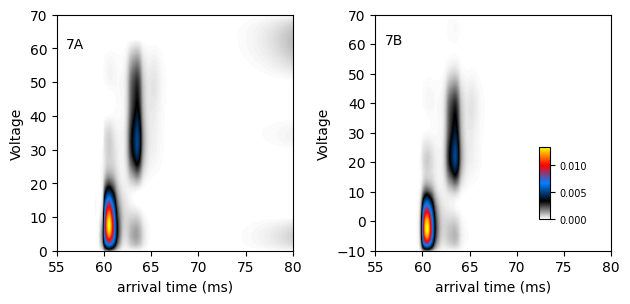

In [101]:
### PLOTS FIGURE 7 ###
hIAPP_A = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_10V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt']
compare_interp2d_RBVspine_interpolation(hIAPP_A)

In [117]:
hIAPP_B = ['2021-03-03_IAPP_2n5_sliceB_0V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_10V_02_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceB_70V_dt_extracted.txt']
#compare_interp2d_RBVspine_interpolation(hIAPP_B)

In [118]:
rIAPP_A =['2021-03-04_rIAPP_2n5_sliceA_0V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_10V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_20V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_30V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_40V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_50V_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceA_60V_dt_extracted.txt']
#compare_interp2d_RBVspine_interpolation(rIAPP_A)

In [119]:
rIAPP_B = ['2021-03-04_rIAPP_2n5_sliceB_0V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_10V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_20V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_30V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_40V_02_dt_extracted.txt',
                 '2021-03-04_rIAPP_2n5_sliceB_50V_02_dt_extracted.txt']
#compare_interp2d_RBVspine_interpolation(rIAPP_B)

<p>When comparing RBV and CT interpoltion techniques, two functions are required; one to extract the data and the other for formatting the data and running the interpolations, as the interpolations require different data formats</p>
<p>The function immediately below extracts the data from the raw data files similarly to the extract_data_for2D function, but the volatge is taken down to -10 in case interpolation against a hard cut-off might lead to unrealistic peak shapes.</p>
<p>The subsequent two functions take the output of extract_data_for_RB_CT_interpolation and run either RBV or CT interpolation on the data. This could not all be run in a single function as these to interpolation techniques require different data formats. The plotting is done in yet one more function, plot_fit, so that results from RBV and CT interpolation could be plotted side by side.</p>

In [33]:
def extract_data_for_RB_CT_interpolation(filenames):
    '''extracts data into format that can be inputted into a RBV or CT interpolation function
    returns three lists of time, voltage and intensity data'''
    datastore = {}
    for filename in filenames:
        with open (filename, 'r') as f:
            filenameparts = filename.split('_')
            voltage = filenameparts[4].replace('V', '')
            voltage = int(voltage)
            arrtime = []
            intensity = []
            for dataline in f:
                dataline = dataline.replace('\n', '')
                arrtime_intensity = dataline.split('\t')
                arrtime.append(float(arrtime_intensity[0]))
                intensity.append(float(arrtime_intensity[1]))         
                pairs = list(zip(arrtime, intensity))
            datastore[voltage] = pairs
    intensity0 = [0]*200
    pairs0 = list(zip(arrtime, intensity0))
    datastore[-10] = pairs0

    arrts_for2d = []
    intens_for2d = []
    volts_for2d = []
    for k, pair in sorted(datastore.items()):
        for i in pair:
            arrts_for2d.append(i[0])
            intens_for2d.append(i[1])
            volts_for2d.append(k)
    
    return arrts_for2d, intens_for2d, volts_for2d

In [34]:
arrtsHA, intensHA, voltsHA = extract_data_for_RB_CT_interpolation(hIAPP_A)
arrtsHB, intensHB, voltsHB = extract_data_for_RB_CT_interpolation(hIAPP_B)
arrtsRA, intensRA, voltsRA = extract_data_for_RB_CT_interpolation(rIAPP_A)
arrtsRB, intensRB, voltsRB = extract_data_for_RB_CT_interpolation(rIAPP_B)

In [35]:

class MinStdNormalDistributionX(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] =  0
        NormalDistribution.__init__(self, *args, **kw)
class MinStdNormalDistributionY(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] = 0
        NormalDistribution.__init__(self, *args, **kw)

def CTinterp_PomegranateGMM(arrts, intens, volts, n_comp):
    '''takes output of extract_data_for_RB_CT_interpolation function, plus number of components as an integer.
    Runs CT interpolation, fits Gaussians using Pomegranate.
    Return dictionary of the interpolated data and all other parameters required for plotting'''
    X2d = np.array(sorted(set(arrts)))
    Y2d = np.array(sorted(set(volts)))
    Z2d = np.array(intens)
    Z2d = Z2d.reshape(len(Y2d), len(X2d))

    x_grid, y_grid = np.meshgrid(X2d, Y2d)
    x_grid_flat = x_grid.ravel()
    y_grid_flat = y_grid.ravel()

    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs
    zdata = Z2d.ravel()
    interp_func = CloughTocher2DInterpolator(stacked_points, zdata)

    X_max = 80
    X_min = X2d.min()
    Y_min = Y2d.min()
    Y_max = (max(volts))

    n_smoothy = 200
    n_smoothx = 200

    X2d_plot = np.linspace(X_min, X_max, n_smoothx)
    Y2d_plot = np.linspace(Y_min, Y_max, n_smoothy) 

    x_grid, y_grid = np.meshgrid(X2d_plot, Y2d_plot)
    x_grid_flat = x_grid.ravel()
    y_grid_flat = y_grid.ravel()

    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1)

    Intens2d_plot = interp_func(stacked_points).reshape(n_smoothx, n_smoothy)
    Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)
    
    x_range = (X_min, X_max)
    y_range = (Y_min, Y_max)
    
    Volts_new = Y2d_plot # np.linspace(0, 70, 200)

    n,m = Intens2d_plot.shape

    x_smootharrT_coords = []
    y_smoothV_coords = []
    smooth_intensities = []

    for i in range(n):
        for j in range(m):
            intensity_value = int(Intens2d_plot[j,i])
            x_smootharrT_coords.append(X2d_plot[i])        
            y_smoothV_coords.append(Volts_new[j])
            smooth_intensities.append(intensity_value)

    smoothxycoords = list(zip(x_smootharrT_coords, y_smoothV_coords))
    smoothxycoords = np.array(smoothxycoords)
    smooth_intensities = np.array(smooth_intensities)
    
    gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                         n_comp, smoothxycoords, smooth_intensities, n_init=10, max_kmeans_iterations=50, 
                                          stop_threshold=0.1, lr_decay=0.5, verbose=False)
    df = (5 * n_comp) - 1
    lp = (gmm.log_probability(smoothxycoords) * smooth_intensities).sum()  
    bic = float(df * np.log(len(smoothxycoords)) - 2.0 * lp)
    
    comp_params = [comp.parameters[0] for comp in gmm.distributions] 
    x_params = [cp[0].parameters for cp in comp_params]
    y_params = [cp[1].parameters for cp in comp_params]
  
    x_vals_mean, x_vals_var = zip(*x_params) 
    y_vals_mean, y_vals_var = zip(*y_params) 
    x_vals_std = np.sqrt(x_vals_var)
    y_vals_std = np.sqrt(y_vals_var)

    x_points = X2d_plot  
    y_points = Y2d_plot 
    
    x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of smoothxycoords
    x_grid_flat = x_grid.ravel()  # Flatten to list
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

    density = gmm.log_probability(stacked_points) # comes as log probabilties
    density = np.exp(density) # Real probs
    density_2d = density.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)
    
    norm_orig = Intens2d_plot/Intens2d_plot.sum()
    norm_pred = density_2d/density_2d.sum()
    resid = np.subtract(norm_orig, norm_pred)
    
    resid_sqs = resid * resid
    mean_sqs = np.mean(resid_sqs)
    rmsd = np.sqrt(mean_sqs)
    
    keys = ['Intens2d_plot', 'x_range', 'y_range', 'X_min', 'X_max', 'Y_min', 'Y_max', 
            'smoothxycoords', 'smooth_intensities', 'X2d_plot', 'Y2d_plot', 
            'x_vals_mean', 'y_vals_mean', 'x_vals_std', 'y_vals_std', 'density_2d', 'resid', 'rmsd']
    
    vals = [Intens2d_plot, x_range, y_range, X_min, X_max, Y_min, Y_max, 
            smoothxycoords, smooth_intensities, X2d_plot, Y2d_plot, 
            x_vals_mean, y_vals_mean, x_vals_std, y_vals_std, density_2d, resid, rmsd]
    
    dicty = dict(zip(keys, vals))
    
    return dicty

In [36]:
CTHA = CTinterp_PomegranateGMM(arrtsHA, intensHA, voltsHA, 4)
CTHB = CTinterp_PomegranateGMM(arrtsHB, intensHB, voltsHB, 4)
CTRA = CTinterp_PomegranateGMM(arrtsRA, intensRA, voltsRA, 3)
CTRB = CTinterp_PomegranateGMM(arrtsRB, intensRB, voltsRB, 6)

In [37]:
def RBinterp_PomegranateGMM(arrts, intens, volts, n_comp):
    '''takes output of extract_data_for_RB_CT_interpolation function, plus number of components as integer.
    Runs RBV interpolation, fits Gaussians using Pomegranate.
    Return dictionary of the interpolated data and other plotting parameters, including residuals and RMSD'''
    X2d = np.array(sorted(set(arrts))) #flat list
    Y2d = np.array(sorted(set(volts))) #flat list 0 to 70 once
    Z2d = np.array(intens)
    Z2d = Z2d.reshape(len(Y2d), len(X2d)).T

    interp_func = RectBivariateSpline(X2d, Y2d, Z2d, bbox=[None, None, None, None], kx=3, ky=3, s=0)

    X_max = 80
    X_min = X2d.min()
    Y_min = Y2d.min()
    Y_max = (max(volts))

    n_smooth = 200 

    X2d_plot = np.linspace(X_min, X_max, n_smooth)
    Y2d_plot = np.linspace(Y_min, Y_max, n_smooth) 

    Intens2d_plot = interp_func(X2d_plot, Y2d_plot)
    Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)

    x_range = (X_min, X_max)
    y_range = (Y_min, Y_max)

    Volts_new = Y2d_plot

    n,m = Intens2d_plot.shape

    x_smootharrT_coords = []
    y_smoothV_coords = []
    smooth_intensities = []
    
    for i in range(n):
        for j in range(m):
            intensity_value = int(Intens2d_plot[j,i])
            x_smootharrT_coords.append(X2d_plot[j])  #i      
            y_smoothV_coords.append(Volts_new[i]) #j
            smooth_intensities.append(intensity_value)

    smoothxycoords = list(zip(x_smootharrT_coords, y_smoothV_coords))
    smoothxycoords = np.array(smoothxycoords)
    smooth_intensities = np.array(smooth_intensities)

    gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                         n_comp, smoothxycoords, smooth_intensities, n_init=10, max_kmeans_iterations=50, 
                                          stop_threshold=0.1, lr_decay=0.5, verbose=False)

    df = (5 * n_comp) - 1
    lp = (gmm.log_probability(smoothxycoords) * smooth_intensities).sum()  
    bic = float(df * np.log(len(smoothxycoords)) - 2.0 * lp)

    comp_params = [comp.parameters[0] for comp in gmm.distributions] 
    x_params = [cp[0].parameters for cp in comp_params]
    y_params = [cp[1].parameters for cp in comp_params]

    x_vals_mean, x_vals_var = zip(*x_params) 
    y_vals_mean, y_vals_var = zip(*y_params) 
    x_vals_std = np.sqrt(x_vals_var)
    y_vals_std = np.sqrt(y_vals_var)

    x_points = X2d_plot  
    y_points = Y2d_plot 

    x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of smoothxycoords
    x_grid_flat = x_grid.ravel()  # Flatten to list
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

    density = gmm.log_probability(stacked_points) # comes as log probabilties
    density = np.exp(density) # Real probs
    density_2d = density.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)

    norm_orig = Intens2d_plot.T/Intens2d_plot.T.sum()
    norm_pred = density_2d/density_2d.sum()
    resid = np.subtract(norm_orig, norm_pred)

    resid_sqs = resid * resid
    mean_sqs = np.mean(resid_sqs)
    rmsd = np.sqrt(mean_sqs)
    
    keys = ['Intens2d_plot', 'x_range', 'y_range', 'X_min', 'X_max', 'Y_min', 'Y_max', 
            'smoothxycoords', 'smooth_intensities', 'X2d_plot', 'Y2d_plot', 
            'x_vals_mean', 'y_vals_mean', 'x_vals_std', 'y_vals_std', 'density_2d', 'resid', 'rmsd']
    
    vals = [Intens2d_plot, x_range, y_range, X_min, X_max, Y_min, Y_max, 
            smoothxycoords, smooth_intensities, X2d_plot, Y2d_plot, 
            x_vals_mean, y_vals_mean, x_vals_std, y_vals_std, density_2d, resid, rmsd]
    
    dicty = dict(zip(keys, vals))
    
    return dicty

In [38]:
RBHA = RBinterp_PomegranateGMM(arrtsHA, intensHA, voltsHA, 4)
RBHB = RBinterp_PomegranateGMM(arrtsHB, intensHB, voltsHB, 4)
RBRA = RBinterp_PomegranateGMM(arrtsRA, intensRA, voltsRA, 3)
RBRB = RBinterp_PomegranateGMM(arrtsRB, intensRB, voltsRB, 6)

In [102]:
def plot_fit(RBd, CTd):
    '''takes dictionary output from both RBV and CT interpolation functions. 
    Returns plots density plots of interpolated data from both methods and Gaussian fitting using Pomegranate'''
    density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)
    residual_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FF0000', '#FFFFFF','#0080FF'], N=256)
    
    fig, axarr = plt.subplots(2,3, figsize=(9,6))

    aspect0 = (RBd['x_range'][1] - RBd['x_range'][0])/(RBd['y_range'][1] - RBd['y_range'][0])
    axarr[0,0].imshow(RBd['Intens2d_plot'].T, cmap=density_colormap, origin='lower', extent=RBd['x_range'] + RBd['y_range'], aspect=aspect0, vmin=0.0)
    axarr[0,0].text(57, 45, 'A', c='k', fontsize=14)
    
    if axarr[0,0]:
        cax = fig.add_axes((0.92, 0.32, 0.017, 0.15)) # (x0, y0, width, height)    
        cax.tick_params(labelsize=7)
        plt.colorbar(im, cax=cax)

    
    axarr[0,1].set_xlim(RBd['X_min'], RBd['X_max'])
    axarr[0,1].set_ylim(RBd['Y_min'], RBd['Y_max'])
    aspect1 = (RBd['X_max'] - RBd['X_min']) / (RBd['Y_max'] - RBd['Y_min'])
    axarr[0,1].imshow(RBd['Intens2d_plot'].T, cmap=density_colormap, origin='lower', extent=(RBd['X_min'], RBd['X_max'], RBd['Y_min'], RBd['Y_max']), aspect=aspect0)
    axarr[0,1].scatter(RBd['x_vals_mean'], RBd['y_vals_mean'], s=10, c='red', marker='*', label='Means')
    axarr[0,1].errorbar(RBd['x_vals_mean'], RBd['y_vals_mean'], RBd['y_vals_std'], RBd['x_vals_std'], fmt='none', color='red',alpha=0.3,  label='StdDevs', capsize=0.5)
    axarr[0,1].legend()
    axarr[0,1].text(57, 45, 'B', c='k', fontsize=14)
    
    vmax = max(RBd['resid'].max(), - RBd['resid'].min())
    RMSD = f"RMSD={RBd['rmsd']:.7f}"
    axarr[0,2].imshow(RBd['resid'], cmap=residual_colormap, origin='lower', vmin=-vmax, vmax=vmax, extent=(CTd['X_min'], CTd['X_max'], CTd['Y_min'], CTd['Y_max']), aspect=aspect0)
    axarr[0,2].text(65, -3, RMSD, c='k')
    axarr[0,2].text(57, 45, 'C', c='k', fontsize=14)
 
    aspect0 = (CTd['x_range'][1] - CTd['x_range'][0])/(CTd['y_range'][1] - CTd['y_range'][0])
    axarr[1,0].imshow(CTd['Intens2d_plot'], cmap=density_colormap, origin='lower', extent=CTd['x_range'] + CTd['y_range'], aspect=aspect0, vmin=0.0)
    axarr[1,0].text(57, 45, 'D', c='k', fontsize=14)
    
    axarr[1,1].set_xlim(CTd['X_min'], CTd['X_max'])
    axarr[1,1].set_ylim(CTd['Y_min'], CTd['Y_max'])
    aspect1 = (CTd['X_max'] - CTd['X_min']) / (CTd['Y_max'] - CTd['Y_min'])
    axarr[1,1].imshow(CTd['Intens2d_plot'], cmap=density_colormap, origin='lower', extent=(CTd['X_min'], CTd['X_max'], CTd['Y_min'], CTd['Y_max']), aspect=aspect0)
    axarr[1,1].scatter(CTd['x_vals_mean'], CTd['y_vals_mean'], s=10, c='red', marker='*', label='Means')
    axarr[1,1].errorbar(CTd['x_vals_mean'], CTd['y_vals_mean'], CTd['y_vals_std'], CTd['x_vals_std'], fmt='none', color='red',alpha=0.3,  label='StdDevs', capsize=0.5)
    axarr[1,1].legend()
    axarr[1,1].text(57, 45, 'E', c='k', fontsize=14)
    
    vmax = max(CTd['resid'].max(), - CTd['resid'].min())
    RMSD = f"RMSD={CTd['rmsd']:.7f}"
    axarr[1,2].imshow(CTd['resid'], cmap=residual_colormap, origin='lower', vmin=-vmax, vmax=vmax, extent=(CTd['X_min'], CTd['X_max'], CTd['Y_min'], CTd['Y_max']), aspect=aspect0)
    axarr[1,2].text(65, -3, RMSD, c='g')
    axarr[1,2].text(57, 45, 'F', c='k', fontsize=14)

    for ax in axarr.flat:
        ax.set(xlabel='arrival time (ms)', ylabel='voltage')
    for ax in axarr.flat:
        ax.label_outer()
        
    fig.subplots_adjust(wspace=0, hspace=0.08)
    plt.show()

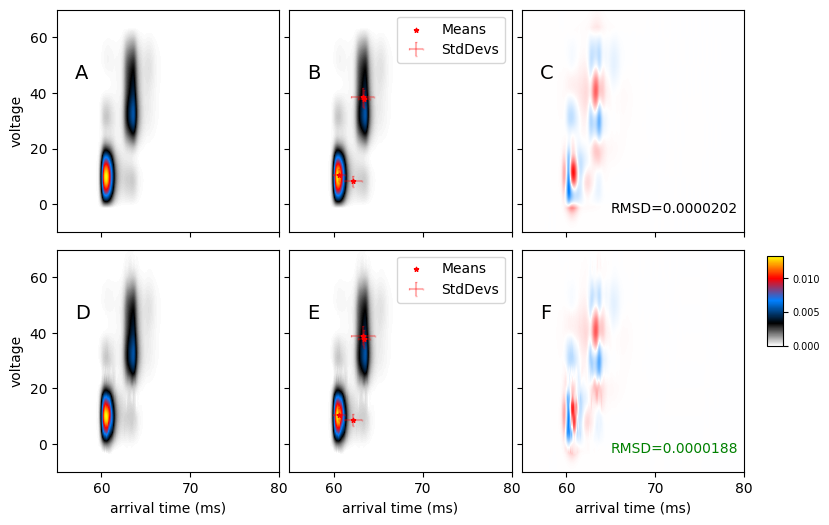

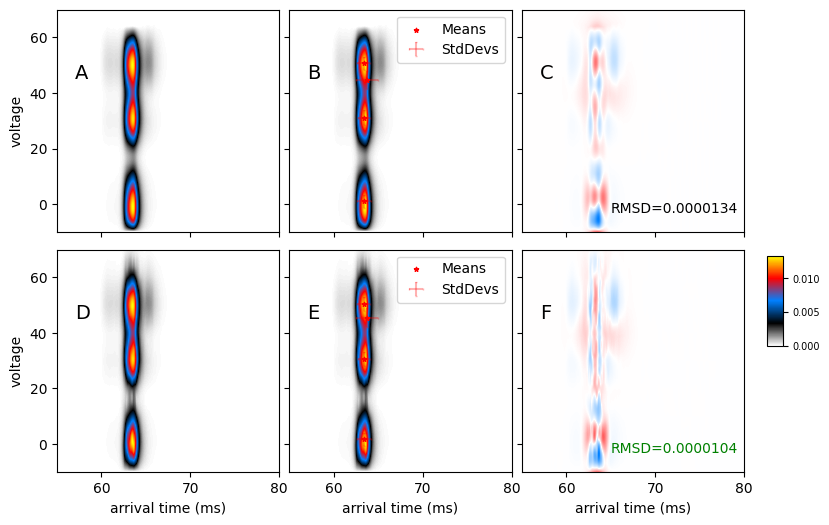

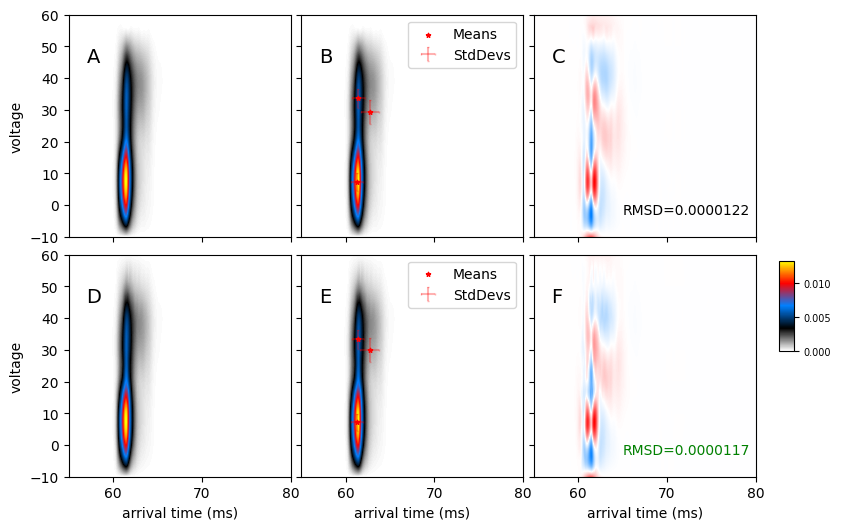

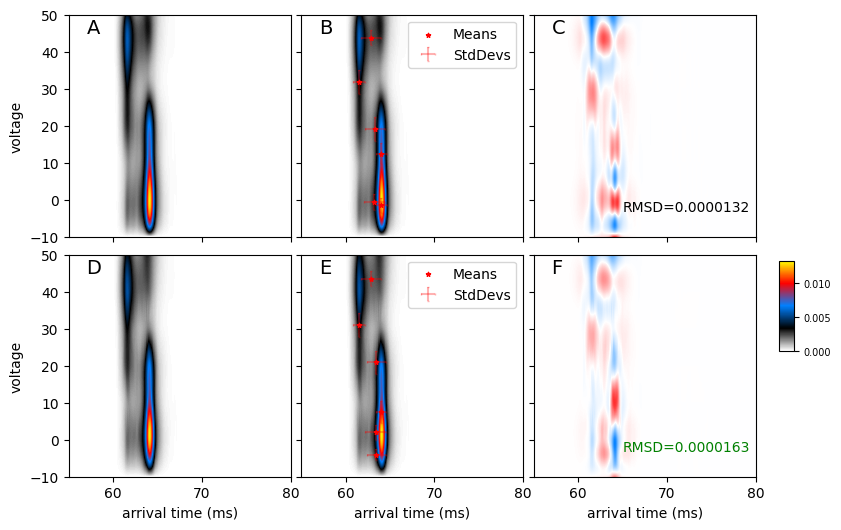

In [103]:
### PLOTS FIGURES 8, 9 (combined) and 10 - 12 ###
plot_fit(RBHA, CTHA)
plot_fit(RBHB, CTHB)
plot_fit(RBRA, CTRA)
plot_fit(RBRB, CTRB)

In [2]:
### PLOTS FIGURE 14 ###

def slice_plot(CTd):
    '''get data in column 10 of intens2d_plot array
    gets data in Y2d_plot and intes2d_plot array corresponding to range of columns in X2d_plot
    returns plots'''
    n_smoothx = 200
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3), sharey=True)

    for i in range(0, 100, 10):
        ax1.plot(CTd['Intens2d_plot'][i,10:(n_smoothx//2)])

    #ax1.set_title('Single horizontal cross section at y-halfway', fontsize=8)
    ax1.set_xlabel('Arrival time (ms)')
    ax1.set_ylabel('Intensity')
    ax1.text(3, 600000, 'A', fontsize=14)

    for i in range(20, len(CTd['X2d_plot'])//2, 5):
        ax2.plot(CTd['Y2d_plot'], CTd['Intens2d_plot'][:,i], label=f'''t={CTd['X2d_plot'][i]:.2f}''', alpha=0.8)
    #ax2.set_title('Vertical cross sections across select time window', fontsize=8)
    ax2.set_xlabel('Voltage')
    ax2.set_ylabel('Intensity')
    ax2.legend(fontsize=7, ncol=2)
    ax2.text(-3, 600000, 'B', fontsize=14)

    for ax in (ax1,ax2):
        ax.label_outer()

    plt.tight_layout()
    
slice_plot(CTHA)

NameError: name 'CTHA' is not defined

<h6>Finding optimal number components by comparing BIC and RMSD for each dataset.</h6>
<p>In order to fit error bars to this, 5 fits were performed for each component number tested. The number of interpolated data points in the grid is described by nsmooth. Typically this is set to 200 but this had to be reduced to 100 here, otherwise the data took too long to generate on the laptop these methods were developed on.</p>

In [ ]:

def CTinterpolation_BICoptimisation(arrival_times, intensities, voltages, nsmooth):
    '''takes output from extract_data_from_2d function. 
    nsmooth describes granularity of interpolated data.
    returns nested lists of results for 2 - 10 components with 5 iterations per component number'''
    X2d = np.array(sorted(set(arrival_times))) 
    Y2d = np.array(sorted(set(voltages)))
    Z2d = np.array(intensities)
    Z2d = Z2d.reshape(len(Y2d), len(X2d))

    x_grid, y_grid = np.meshgrid(X2d, Y2d)
    x_grid_flat = x_grid.ravel()
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1)

    ztest = Z2d.ravel()
 
    X_max = 80
    X_min = X2d.min()
    Y_min = Y2d.min()
    Y_max = Y2d.max()
    X2d_plot = np.linspace(X_min, X_max, n_smooth)
    Y2d_plot = np.linspace(Y_min, Y_max, n_smooth) 

    interp_func = CloughTocher2DInterpolator(stacked_points, ztest)

    x_grid, y_grid = np.meshgrid(X2d_plot, Y2d_plot)
    x_grid_flat = x_grid.ravel()
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1)

    nsmooth = 100
    
    Intens2d_plot = interp_func(stacked_points).reshape(n_smooth, n_smooth)
    Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)

    x_range = (X_min, X_max)
    y_range = (Y_min, Y_max)
    
    Volts_new = Y2d_plot

    n,m = Intens2d_plot.shape

    x_smootharrT_coords = []
    y_smoothV_coords = []
    smooth_intensities = []

    for i in range(n):
        for j in range(m):
            intensity_value = int(Intens2d_plot[j,i])
            x_smootharrT_coords.append(X2d_plot[i])        
            y_smoothV_coords.append(Volts_new[j])
            smooth_intensities.append(intensity_value)

    smoothxycoords = list(zip(x_smootharrT_coords, y_smoothV_coords))
    smoothxycoords = np.array(smoothxycoords)
    smooth_intensities = np.array(smooth_intensities)

    plot_params = [X2d, Y2d, Z2d, X_max, X_min, Y_min, Y_max, X2d_plot, Y2d_plot]

    class MinStdNormalDistributionX(NormalDistribution):
        def __init__(self, *args, **kw):
            kw['min_std'] = 0 #0.4 #0.1 #0.8 #1 #2#0.6
            NormalDistribution.__init__(self, *args, **kw)
    class MinStdNormalDistributionY(NormalDistribution):
        def __init__(self, *args, **kw):
            kw['min_std'] = 0 #7 #8 #1 #5#11 ##stick w 10
            NormalDistribution.__init__(self, *args, **kw)
    
    test_n_components = [2,3,4,5,6,7,8,9,10]
    gmmlist = [] #objects for each components
    master_bic_list = []
    master_rmsd_list = []
    n_runs = [1,2,3,4,5]

    for n_run in n_runs:
        bic_list = []
        rmsd_list = []
        for i, n_comp in enumerate(test_n_components):
            gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                                 n_comp, smoothxycoords, smooth_intensities, n_init=1, max_kmeans_iterations=50, 
                                                  stop_threshold=0.1, verbose=False) #removed lr_decay
            gmmlist.append(gmm)
            df = (5 * n_comp) - 1
            lp = (gmm.log_probability(smoothxycoords) * smooth_intensities).sum() #sum, as in log space, normally porbs would multiply. 
            bic = float(df * np.log(len(smoothxycoords)) - 2.0 * lp) # For evaluating best n_comp
            bic_list.append(bic)

            comp_params = [comp.parameters[0] for comp in gmm.distributions] # Selects IndependentComponentsDistribution for each Gaussian
            x_params = [cp[0].parameters for cp in comp_params] # NormalDistribution for X : Mean, Var pairs
            y_params = [cp[1].parameters for cp in comp_params] # NormalDistribution for Y : Mean, Var pairs

            x_vals_mean, x_vals_var = zip(*x_params) 
            y_vals_mean, y_vals_var = zip(*y_params) 

            x_vals_std = np.sqrt(x_vals_var)
            y_vals_std = np.sqrt(y_vals_var)

            x_points = X2d_plot  
            y_points = Y2d_plot 

            x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of smoothxycoords
            x_grid_flat = x_grid.ravel()  # Flatten to list
            y_grid_flat = y_grid.ravel() 
            stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

            density = gmmlist[i].log_probability(stacked_points) # comes as log probabilties
            density = np.exp(density) # Real probs
            density_2d = density.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)

            norm_orig = Intens2d_plot/Intens2d_plot.sum()
            norm_pred = density_2d/density_2d.sum()

            resid = np.subtract(norm_orig, norm_pred)
            resid_sqs = resid * resid
            mean_sqs = np.mean(resid_sqs)
            rmsd = np.sqrt(mean_sqs)
            rmsd_list.append(rmsd)

        master_rmsd_list.append(rmsd_list)
        master_bic_list.append(bic_list)

    master_gradient_list = []
    for listy in master_bic_list:
        gradlist = []
        for i in range(0, len(listy)-1):
            grad = listy[i+1] - listy[i]
            gradlist.append(grad)
        master_gradient_list.append(gradlist)       

    return master_bic_list, master_gradient_list, master_rmsd_list


In [ ]:
master_bicHA, master_gradientHA, master_rmsdHA = CTinterpolation(arrtsHA, intensHA, voltsHA, 100)
master_bicHB, master_gradientHB, master_rmsdHB = CTinterpolation(arrtsHB, intensHB, voltsHB, 100)
master_bicRA, master_gradientRA, master_rmsdRA = CTinterpolation(arrtsRA, intensRA, voltsRA, 100)
master_bicRB, master_gradientRB, master_rmsdRB = CTinterpolation(arrtsRB, intensRB, voltsRB, 100)

In [ ]:
### PLOTS FIGURE 14 ###
def bic_rmsd_plotter(master_bic_list, master_gradient_list, master_rmsd_list):
    bic_arrays = [np.array(blist) for blist in master_bic_list]
    bic_means = [np.mean(b) for b in zip(*bic_arrays)]
    bic_std = [np.std(b, ddof=1) for b in zip(*bic_arrays)]

    gradient_arrays = [np.array(glist) for glist in master_gradient_list]
    gradient_means = [np.mean(g) for g in zip(*gradient_arrays)]
    gradient_std = [np.std(g, ddof=1) for g in zip(*gradient_arrays)]

    rmsd_arrays = [np.array(rlist) for rlist in master_rmsd_list]
    rmsd_means = [np.mean(r) for r in zip(*rmsd_arrays)]
    rmsd_std = [np.std(r, ddof=1) for r in zip(*rmsd_arrays)]

    xg = [2,3,4,5,6,7,8,9]
    xr = [2,3,4,5,6,7,8,9,10]

    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4))

    ax1.errorbar(xg, gradient_means, yerr=gradient_std)
    ax1.set_ylabel('change in gradient [n_components, bic]')
    ax1.set_xlabel('n_components')

    ax2.errorbar(xr, rmsd_means, yerr=rmsd_std)
    ax2.set_ylabel('RMSD')
    ax2.set_xlabel('n_components')

    plt.show()
    
bic_rmsd_plotter(master_bic_HA, master_gradientHA, master_rmsdHA)

In [ ]:
bic_rmsd_plotter(master_bic_HB, master_gradientHB, master_rmsdHB)
bic_rmsd_plotter(master_bic_RA, master_gradientRA, master_rmsdRA)
bic_rmsd_plotter(master_bic_RB, master_gradientRB, master_rmsdRB)

<h6>Measuring changes in propotion of starting Gaussian to product Gaussians between the start and end of the experiment</h6>
<p>This final section of the methods contains functions for defining the starting (parent) peak, accounting for small peaks that may be present nearby, then calculating the relative abundance of parent vs child peaks</p>

In [105]:
def parent_child_peaks(arrts, intens, volts, n_comp):
    
    '''takes input from extract_data_for2D
    interpoltes using CT method
    fits Gaussians using Pomegranate
    gets probability for each individual fitted Gaussian
    uses xy coordinates and intensity of Gaussian means to determine identity of parent peak
    calculates probability of parent vs all_peaks_minus_parent_peak
    returns wanring message under certain criteria when defining parent peak'''
    
    X2d = np.array(sorted(set(arrts)))
    Y2d = np.array(sorted(set(volts)))
    Z2d = np.array(intens)
    Z2d = Z2d.reshape(len(Y2d), len(X2d))

    x_grid, y_grid = np.meshgrid(X2d, Y2d)
    x_grid_flat = x_grid.ravel()
    y_grid_flat = y_grid.ravel()

    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs
    zdata = Z2d.ravel()
    interp_func = CloughTocher2DInterpolator(stacked_points, zdata)

    X_max = 80
    X_min = X2d.min()
    Y_min = Y2d.min()
    Y_max = (max(volts))

    n_smoothy = 200
    n_smoothx = 200

    X2d_plot = np.linspace(X_min, X_max, n_smoothx)
    Y2d_plot = np.linspace(Y_min, Y_max, n_smoothy) 

    x_grid, y_grid = np.meshgrid(X2d_plot, Y2d_plot)
    x_grid_flat = x_grid.ravel()
    y_grid_flat = y_grid.ravel()

    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1)

    Intens2d_plot = interp_func(stacked_points).reshape(n_smoothx, n_smoothy)
    Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)
    
    x_range = (X_min, X_max)
    y_range = (Y_min, Y_max)
    
    Volts_new = Y2d_plot

    n,m = Intens2d_plot.shape

    x_smootharrT_coords = []
    y_smoothV_coords = []
    smooth_intensities = []

    for i in range(n):
        for j in range(m):
            intensity_value = int(Intens2d_plot[j,i])
            x_smootharrT_coords.append(X2d_plot[i])        
            y_smoothV_coords.append(Volts_new[j])
            smooth_intensities.append(intensity_value)

    smoothxycoords = list(zip(x_smootharrT_coords, y_smoothV_coords))
    smoothxycoords = np.array(smoothxycoords)
    smooth_intensities = np.array(smooth_intensities)
    
    gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                         n_comp, smoothxycoords, smooth_intensities, n_init=10, max_kmeans_iterations=50, 
                                          stop_threshold=0.1, lr_decay=0.5, verbose=False)
    df = (5 * n_comp) - 1
    lp = (gmm.log_probability(smoothxycoords) * smooth_intensities).sum()  
    bic = float(df * np.log(len(smoothxycoords)) - 2.0 * lp)
    
    comp_params = [comp.parameters[0] for comp in gmm.distributions] 
    x_params = [cp[0].parameters for cp in comp_params]
    y_params = [cp[1].parameters for cp in comp_params]
  
    x_vals_mean, x_vals_var = zip(*x_params) 
    y_vals_mean, y_vals_var = zip(*y_params) 
    x_vals_std = np.sqrt(x_vals_var)
    y_vals_std = np.sqrt(y_vals_var)

    x_points = X2d_plot  
    y_points = Y2d_plot 
    
    x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of smoothxycoords
    x_grid_flat = x_grid.ravel()  # Flatten to list
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

    density_all = gmm.log_probability(stacked_points) # comes as log probabilties
    density_all = np.exp(density_all) # Real probs
    density_all = density_all.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)
    
    density_separate = gmm.predict_log_proba(stacked_points) # comes as log probabilties
    density_separate = np.exp(density_separate) # Real probs
        
    inten_at_means = []
    for j, yval in enumerate(y_vals_mean):
        xval = x_vals_mean[j]
        # get axis indices relative to sampled, interpolated grid
        y = np.searchsorted(y_points, yval) #must be pre sorted for this but scans for number(eg yval) and gives back grid points
        x = np.searchsorted(x_points, xval)
        dentest2 = density_all[y, x] #getting the intensity val at the calculated grid points
        inten_at_means.append(dentest2)

    inten_max_list_pos = np.argmax(inten_at_means)
    yvals_mean_min_list_pos = np.argmin(y_vals_mean)

    msg = ''
    if inten_max_list_pos == yvals_mean_min_list_pos:
        ref_idx = inten_max_list_pos
    else:
        yval_inten_max = y_vals_mean[inten_max_list_pos]
        if (yval_inten_max - min(y_vals_mean)) < 12: #hardcoded intentionally.  
            ref_idx = inten_max_list_pos
        else:
            ref_idx = inten_max_list_pos
            msg += 'warning - examine results manually'

    other_idx = np.array([idx for idx in range(n_comp) if idx != ref_idx])
    
    density_ref = density_separate[:,ref_idx]
    density_other = density_separate[:,other_idx].sum(axis=1)
    
    density_ref = density_ref.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)
    density_ref *= density_all
    
    density_other = density_other.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)
    density_other *= density_all
    
    volt_proj_ref = density_ref.sum(axis=1)
    volt_proj_other = density_other.sum(axis=1)

    keys = [ 'X_min', 'X_max', 'Y_min', 'Y_max', 'density_other', 'x_vals_mean', 
             'y_vals_mean', 'density_ref', 'x_points', 'y_points', 'volt_proj_ref', 'volt_proj_other', 'density_all', 'msg']  

    vals = [ X_min, X_max, Y_min, Y_max, density_other, x_vals_mean, 
             y_vals_mean, density_ref, x_points, y_points, volt_proj_ref, volt_proj_other, density_all, msg]  

    dicty = dict(zip(keys, vals))
    
    return dicty


In [106]:
parent_child_HA = parent_child_peaks(arrtsHA, intensHA, voltsHA, 4)
parent_child_HB = parent_child_peaks(arrtsHB, intensHB, voltsHB, 4)
parent_child_RA = parent_child_peaks(arrtsRA, intensRA, voltsRA, 3)
parent_child_RB = parent_child_peaks(arrtsRB, intensRB, voltsRB, 6)

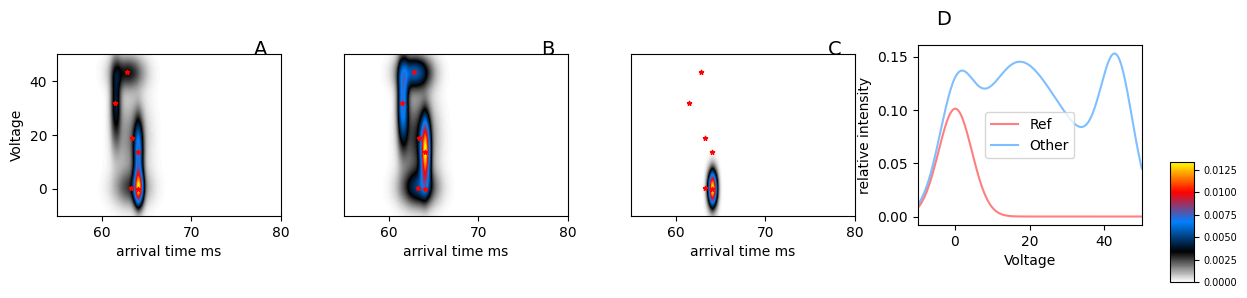

In [110]:
### PLOTS FIGURE 16 ###
def plot_parent_child(PCd):
    '''plots the output of the parent_child_peaks function'''
    density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)
    fig, axarr = plt.subplots(1,4, figsize=(14,6), )

    aspect = (PCd['X_max'] - PCd['X_min'])/(PCd['Y_max'] - PCd['Y_min'])
    extent = (PCd['X_min'], PCd['X_max'], PCd['Y_min'], PCd['Y_max'])
    
    ax0 = axarr[0]
    ax0.set_xlabel('arrival time ms')
    ax0.set_ylabel('Voltage')
    ax0.set_xlim(PCd['X_min'], PCd['X_max'])
    ax0.set_ylim(PCd['Y_min'], PCd['Y_max'])
    ax0.imshow(PCd['density_all'], cmap=density_colormap, origin='lower', extent=(PCd['X_min'], PCd['X_max'], PCd['Y_min'], PCd['Y_max']), aspect=0.3) 
    ax0.scatter(PCd['x_vals_mean'], PCd['y_vals_mean'], s=10, c='red', marker='*', label='Means')
    ax0.text(77,50, 'A', fontsize=14)
    
    if ax0:
        cax = fig.add_axes((0.92, 0.25, 0.017, 0.2)) # (x0, y0, width, height)    
        cax.tick_params(labelsize=7)
        plt.colorbar(im, cax=cax)
    
    ax1 = axarr[1]
    ax1.set_yticks([])
    ax1.set_xlabel('arrival time ms')
    ax1.set_xlim(PCd['X_min'], PCd['X_max'])
    ax1.set_ylim(PCd['Y_min'], PCd['Y_max'])
    ax1.imshow(PCd['density_other'], cmap=density_colormap, origin='lower',extent=extent , aspect=0.3) 
    ax1.scatter(PCd['x_vals_mean'], PCd['y_vals_mean'], s=10, c='red', marker='*', label='Means')
    ax1.text(77,50, 'B', fontsize=14)
    
    ax2 = axarr[2]
    ax2.set_yticks([])
    ax2.set_xlabel('arrival time ms')
    ax2.set_xlim(PCd['X_min'], PCd['X_max'])
    ax2.set_ylim(PCd['Y_min'], PCd['Y_max'])
    ax2.imshow(PCd['density_ref'], cmap=density_colormap, origin='lower', extent=extent, aspect=0.3) 
    ax2.scatter(PCd['x_vals_mean'], PCd['y_vals_mean'], s=10, c='red', marker='*', label='Means')
    ax2.text(77,50, 'C', fontsize=14)
    
    ax3 = axarr[3]
    ax3.set_xlim(PCd['Y_min'], PCd['Y_max'])
    ax3.plot(PCd['y_points'], PCd['volt_proj_ref'], alpha=0.5, color='#FF0000', label='Ref')
    ax3.plot(PCd['y_points'],PCd['volt_proj_other'], alpha=0.5, color='#0080FF', label='Other')
    ax3.set_xlabel('Voltage')
    ax3.set_ylabel('relative intensity')
    ax3.legend()
    ratio = 0.8
    x_left, x_right = ax3.get_xlim()
    y_low, y_high = ax3.get_ylim()
    ax3.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
    ax3.text(-5,0.18, 'D', fontsize=14)

    fig.subplots_adjust(wspace=0.28, hspace=0.08)
    fig.suptitle(PCd['msg'], y=0.71, c='r')
    plt.show()
    
plot_parent_child(parent_child_RB)

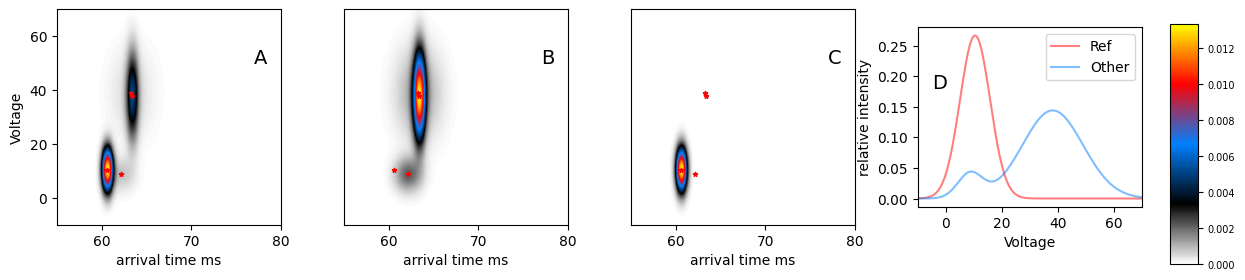

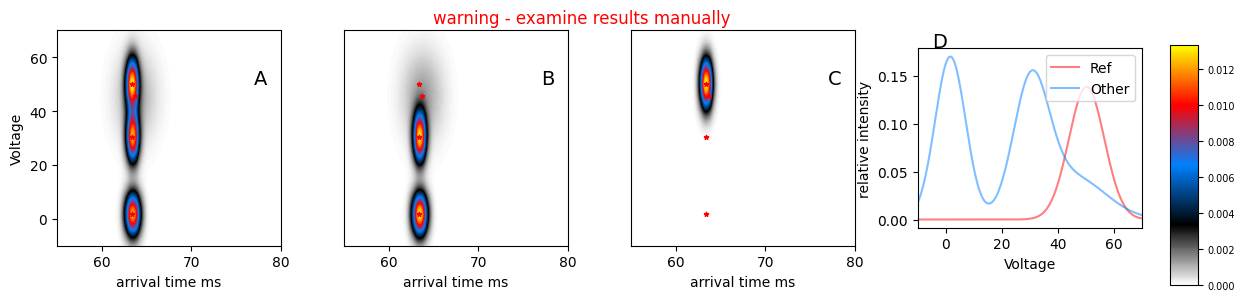

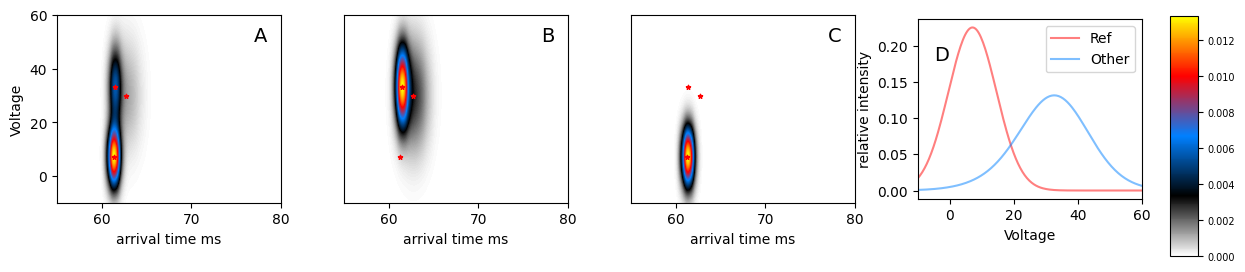

In [109]:
plot_parent_child(parent_child_HA)

### PLOTS FIGURES 17, 18 ###
plot_parent_child(parent_child_HB)
plot_parent_child(parent_child_RA)

In [ ]:
hIAPP_A:
    